In [308]:
#importing the libraries
import pandas as pd
import numpy as np

### Importing the two files companies.csv(as df_comp) and round2.csv(as df_round)
#### used the parameter encoding ='unicode_escape', to deal with file coding issues

In [309]:
#importing companies.csv as df_comp
df_comp = pd.read_csv(r'//Users/abhinavjoshi/Downloads/companies.csv', encoding ='unicode_escape')

In [310]:
# importing rounds.csv as df_round
df_round = pd.read_csv(r'/Users/abhinavjoshi/Downloads/rounds2.csv', encoding ='unicode_escape')

## Checkpoints 
## Checkpoint 1: Data Cleaning 
### Checking the files

#### checking df_comp

In [311]:
## checking df_comp
df_comp.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [312]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [313]:
df_comp.shape

(66368, 10)

In [314]:
## checking the percentage of null values
round(df_comp.isnull().sum()/len(df_comp.index)*100)

permalink         0.0
name              0.0
homepage_url      8.0
category_list     5.0
status            0.0
country_code     10.0
state_code       13.0
region           12.0
city             12.0
founded_at       23.0
dtype: float64

#### We see that the unique identifier for companies i.e permalink has no null values. However country_code has about 10 % null values and category_list has about 5% null values. 
#### Appropriate steps will be taken later on to deal with these null values

### Checking df_round

In [315]:
df_round.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [316]:
df_round.shape

(114949, 6)

In [317]:
df_round.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [318]:
## checking the percentage of null values
round(df_round.isnull().sum()/len(df_round.index)*100)

company_permalink           0.0
funding_round_permalink     0.0
funding_round_type          0.0
funding_round_code         73.0
funded_at                   0.0
raised_amount_usd          17.0
dtype: float64

#### Initial survey shows that again there are no null values in unique identifier company_permalink. The column funding_round_code has aboout 73% null values, which is too high. The column raised_amount_usd has about 17% null values and this column is on of the target variables. Apporpriate steps will be taken for this.

## Checking permalink and company_permalink

### Initial assesment shows that to create the master dataframe we will use the permalink column in df_comp and company_permalink in df_round as the 'merging columns'. 
### This requires a closer analysis of these two columns. 
### Since we have already seen that they dont contain null-values, the next task would be to look for any duplicates and eliminating them. 
### We will also look for any anamolies in the respective columns

### As the initial step let us convert both the columns to lower case to deal with discripancies in data entering

In [319]:
# Converting df_comp['permalink'] to lower case
df_comp['permalink'] = df_comp['permalink'].str.lower()

In [320]:
# Converting df_round['company_permalink'] to lower case
df_round['company_permalink'] = df_round['company_permalink'].str.lower()

### Now let us check for duplicated entries

In [321]:
## Checking duplicates in df_comp['permalink']
df_comp['permalink'].nunique()

66368

In [322]:
## The uniqiue entries are equal to the number of rows i.e 66368, hence we can conclude that
## no duplicates are present
## alternately we could also use the code, which would also show zero duplicates
df_comp['permalink'].duplicated().sum()

0

In [323]:
## Checking duplicates in df_round['company_permalink']
df_round['company_permalink'].nunique()

66370

In [324]:
## number of duplicated entries
df_round['company_permalink'].duplicated().sum()

48579

In [325]:
## These duplicated entries will be removed using drop_duplicates()
df_round = df_round.drop_duplicates(subset='company_permalink')

In [326]:
## Now let us check out df_round['company_permalink'] again
df_round.shape


(66370, 6)

### During in-depth analysis of the df_round['company_permalink'], it was found that some anamolies are present at loactions [33892:33894] and [63486:63489] due to use of special charecters.

In [327]:
## looking at anamolies at [33892:33894]
df_round.iloc[33892:33894]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
58474,/organization/magnet-tech-ç£çÿ³ç§æ,/funding-round/be2fb8789ec4e1902c2a7e1f7313ad3d,venture,A,16-01-2015,NaN


In [328]:
## looking at anamolies at [63486:63489]
df_round.iloc[63486:63489]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
109966,/organization/weichaishi-com,/funding-round/0c878c8df0a14267dc4452d1f3679ea4,venture,A,15-09-2014,3200000.0
109968,/organization/weiche-tech-åè½¦ç§æ,/funding-round/27b0cd2e0b75cbceb717343ea86c2c28,angel,NaN,16-06-2014,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN


### Dealing with 2 entries wont have any major impact on the data analysis. But since we are aware of them, let us remove these anamolies.
### To do that we will simply reassing the values at the specific locations by removing the special charecters.

In [329]:
## Reassinging at [33892]
df_round.iloc[33892]= '/organization/magnet-tech'

In [330]:
## Reassinging at [33892]
df_round.iloc[33893]= '/organization/magnet-tech'

In [331]:
## checking the locations again
df_round.iloc[33892:33894]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
58473,/organization/magnet-tech,/organization/magnet-tech,/organization/magnet-tech,/organization/magnet-tech,/organization/magnet-tech,/organization/magnet-tech
58474,/organization/magnet-tech,/organization/magnet-tech,/organization/magnet-tech,/organization/magnet-tech,/organization/magnet-tech,/organization/magnet-tech


In [332]:
## Reassinging at [63487]
df_round.iloc[63487] = '/organization/weiche-tech'

In [333]:
## Reassinging at [63488]
df_round.iloc[63488] = '/organization/weiche-tech'

In [334]:
## checking the locations again
df_round.iloc[63486:63489]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
109966,/organization/weichaishi-com,/funding-round/0c878c8df0a14267dc4452d1f3679ea4,venture,A,15-09-2014,3.2e+06
109968,/organization/weiche-tech,/organization/weiche-tech,/organization/weiche-tech,/organization/weiche-tech,/organization/weiche-tech,/organization/weiche-tech
109969,/organization/weiche-tech,/organization/weiche-tech,/organization/weiche-tech,/organization/weiche-tech,/organization/weiche-tech,/organization/weiche-tech


In [335]:
## checking for unique values in df_round
df_round.nunique()

company_permalink          66368
funding_round_permalink    66368
funding_round_type            16
funding_round_code            10
funded_at                   4681
raised_amount_usd          12830
dtype: int64

In [336]:
## Now company_permalink shows 66368 unique values
## Dropping the duplicates from company_permalink
df_round = df_round.drop_duplicates(subset='company_permalink')
df_round.shape

(66368, 6)

In [337]:
## since we have dropped rows, let us reset the index
df_round.reset_index(inplace=True,drop=True)

In [338]:
## checking reset index
df_round

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,1e+07
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.40688e+06
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2e+06
4,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1.5873e+06
66364,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,7000
66365,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
66366,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192


### For checkpoint 1 ,we know that the number of unique companies in both companies file and round2 dataframe are  66368.
### Also the colums 'company' from companies dataframe  and 'company_permalink' from round dataframe are the unique keys for each company.

## Merging df_comp and df_round to make the master_frame

In [339]:
## we will be merging on columns df_comp['permalink'] and df_round['company_permalink']
## we will use the 'inner' join to ensure that companies common to both are in master_frame
master_frame = pd.merge(df_comp,df_round,left_on = 'permalink',right_on = 'company_permalink',how='inner')

In [340]:
## checking master_frame
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,1e+07
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.40688e+06
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2e+06
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN


In [341]:
master_frame.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
66356,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1.5873e+06
66357,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,7000
66358,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
66359,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192
66360,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851


In [342]:
master_frame.shape

(66361, 16)

#### Since master_frame has 66361 rows that means there are 7 companies that are are not common to both

## Cleaning the master_frame

In [343]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66361 entries, 0 to 66360
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   permalink                66361 non-null  object
 1   name                     66360 non-null  object
 2   homepage_url             61305 non-null  object
 3   category_list            63216 non-null  object
 4   status                   66361 non-null  object
 5   country_code             59410 non-null  object
 6   state_code               57821 non-null  object
 7   region                   58338 non-null  object
 8   city                     58340 non-null  object
 9   founded_at               51141 non-null  object
 10  company_permalink        66361 non-null  object
 11  funding_round_permalink  66361 non-null  object
 12  funding_round_type       66361 non-null  object
 13  funding_round_code       14137 non-null  object
 14  funded_at                66361 non-nul

### Observations:
### 1.Our main columns of interest here are : permalink, category_list, country_code, funding_round_type, raised_amount_usd  
### 2. There are many null values, duplicated columns( permalink and company_permalink), useless columns and mismatch in dtype for raised_amount_usd.
### Let's deal with these issues.

In [344]:
## changing the dtype for 'raised_amount_usd'
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd'].astype('float')


In [345]:
master_frame.dtypes

permalink                   object
name                        object
homepage_url                object
category_list               object
status                      object
country_code                object
state_code                  object
region                      object
city                        object
founded_at                  object
company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [346]:
## checking for null values as percentages
round(master_frame.isnull().sum()/len(master_frame.index)*100)

permalink                   0.0
name                        0.0
homepage_url                8.0
category_list               5.0
status                      0.0
country_code               10.0
state_code                 13.0
region                     12.0
city                       12.0
founded_at                 23.0
company_permalink           0.0
funding_round_permalink     0.0
funding_round_type          0.0
funding_round_code         79.0
funded_at                   0.0
raised_amount_usd          22.0
dtype: float64

## Observations:
### 1. 'raised_amount_usd' which is a target variable, has a high 22% of null values. Imputing these values may seriously affect the final analysis. So these null values will have to be dropped
### 2. 'country_code' which again is a target variable, has 10% of null values. These null values will also be dropped
### 3. 'category_list' has 5% null values. These can either be dropped or imputed.
### 4. Rest of the null values in other columns won't impact our analysis.

### Taking care of 'raised_amount_usd'

### Checking for outliers

In [347]:
master_frame['raised_amount_usd'].describe()
# huge variations between
## 1.Mean and Median 2.Max and 75%  3. 25% and min
### All these point to the presence of outliers.

count    5.181900e+04
mean     9.786282e+06
std      1.149356e+08
min      0.000000e+00
25%      2.034215e+05
50%      1.200000e+06
75%      5.100000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

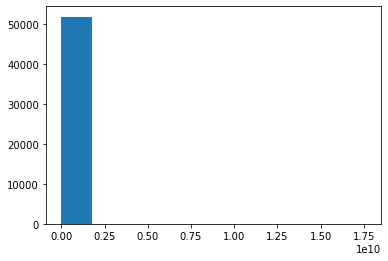

In [348]:
# let us try to see this visually first using a histogram
import matplotlib.pyplot as plt
plt.hist(master_frame['raised_amount_usd'])
plt.show()

##### We see values being congested as the lower end between 0.00 to .025, this indicates strong presence of outliers

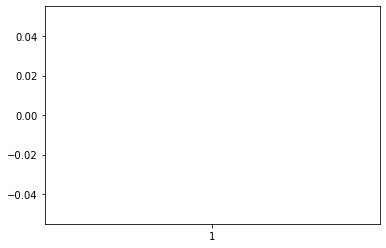

In [349]:
## Checking outliers using boxplot
plt.boxplot(master_frame['raised_amount_usd'])
plt.show()

##### such a plot again indicates strong presence of outliers

## How to deal with outliers in this case?
### Removing outliers in this case wont make much sense because: 1. It will take a lot of time. 2. In terms of funding we can never be sure. 

## Now we will drop the null values in master_frame['raised_amount_usd']
### why drop? about 22% of missing data will affect analysis and imputing could lead to distortions.

In [350]:
## we will use 1200000.0 to fill in the null values in master_frame['raised_amount_usd']
master_frame = master_frame.dropna(subset=['raised_amount_usd'])

In [351]:
master_frame['raised_amount_usd'].describe()

count    5.181900e+04
mean     9.786282e+06
std      1.149356e+08
min      0.000000e+00
25%      2.034215e+05
50%      1.200000e+06
75%      5.100000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [352]:
master_frame['raised_amount_usd'].isnull().sum()

0

In [353]:
round(master_frame.isnull().sum()/len(master_frame.index)*100)

permalink                   0.0
name                        0.0
homepage_url                7.0
category_list               2.0
status                      0.0
country_code                9.0
state_code                 11.0
region                     10.0
city                       10.0
founded_at                 22.0
company_permalink           0.0
funding_round_permalink     0.0
funding_round_type          0.0
funding_round_code         76.0
funded_at                   0.0
raised_amount_usd           0.0
dtype: float64

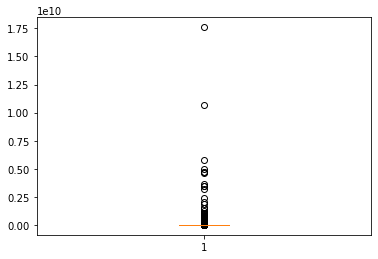

In [354]:
## checking boxplot again for raised_amount_usd
plt.boxplot(master_frame['raised_amount_usd'])
plt.show()

### From here we can see that dropping null values has improved the boxplot representation. 

## Taking care of country_code

### The percantage of missing values comes about 9%. We will be dropping these.

In [355]:
## dropping the null values in master_frame['country_code'] with mode i.e 'USA'
master_frame = master_frame.dropna(subset=['country_code'])

In [356]:
## checking null value percantages again
round(master_frame.isnull().sum()/len(master_frame.index)*100)

permalink                   0.0
name                        0.0
homepage_url                5.0
category_list               1.0
status                      0.0
country_code                0.0
state_code                  3.0
region                      2.0
city                        2.0
founded_at                 20.0
company_permalink           0.0
funding_round_permalink     0.0
funding_round_type          0.0
funding_round_code         75.0
funded_at                   0.0
raised_amount_usd           0.0
dtype: float64

## Taking care of catagory_list

## Here the null rows are just about 1%. Dropping is pretty straight forward using dropna( )

In [357]:
## dropping null values from category_list
master_frame = master_frame.dropna(subset=['category_list'])

In [358]:
(master_frame.isnull().sum()/len(master_frame.index)*100)

permalink                   0.000000
name                        0.002139
homepage_url                5.223194
category_list               0.000000
status                      0.000000
country_code                0.000000
state_code                  2.545291
region                      1.779565
city                        1.775287
founded_at                 19.558103
company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         75.464676
funded_at                   0.000000
raised_amount_usd           0.000000
dtype: float64

In [359]:
## checking shape 
master_frame.shape

(46753, 16)

### Final clean-up of master_frame : Dropping all the irrelevant and duplicate columns.
### For ease and for tracing back the orignal dataframe, let's name this 'cleaned-up' dataframe as master_frame1

In [360]:
## creating master_frame1 by dropping irrelevant columns
master_frame1 = master_frame.drop(['homepage_url','state_code','status','region','city','founded_at','company_permalink','funding_round_code','funded_at','funding_round_permalink'],axis =1)

### Checking out the new master_frame1

In [361]:
master_frame1.shape

(46753, 6)

In [362]:
master_frame1.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
3,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
5,/organization/01games-technology,01Games Technology,Games,HKG,undisclosed,41250.0
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,seed,43360.0
7,/organization/0xdata,H2O.ai,Analytics,USA,seed,3000000.0


In [363]:
## resetiing index
master_frame1.reset_index(inplace=True,drop=True)

### Now we have a clean dataframe with relevant columns and no null values!

# Checkpoint 2: Funding Type Analysis
## Selecting the investment type

 ## We have to choose one of these four investment types for each potential investment:
 ### 1. Seed
 ### 2. Angel
 ### 3. Venture
 ### 4. Private_equity

### Since we have already established the presence of many outliers, we will be focussing on median values for each investment type as being the representative amount 

In [364]:
## modifying master_frame1 to just include the 4 investment types
master_frame1 = master_frame1[master_frame1['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

In [365]:
master_frame1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39925 entries, 0 to 46752
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           39925 non-null  object 
 1   name                39924 non-null  object 
 2   category_list       39925 non-null  object 
 3   country_code        39925 non-null  object 
 4   funding_round_type  39925 non-null  object 
 5   raised_amount_usd   39925 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.1+ MB


In [366]:
## checking mean for each investment type
master_frame1.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False)

funding_round_type
private_equity    7.833586e+07
venture           1.093223e+07
angel             8.826563e+05
seed              7.082920e+05
Name: raised_amount_usd, dtype: float64

In [368]:
## checking median for each investment type
master_frame1.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending = False)

funding_round_type
private_equity    22752829.0
venture            4130452.0
angel               400000.0
seed                251115.0
Name: raised_amount_usd, dtype: float64

### We can see that the mean (which represents the most representative value of a dataset) for venture type investment is about 11million USD which lies in the range 5-15 million USD.

### Representing this visually

In [369]:
## importing seaborn library
import seaborn as sns

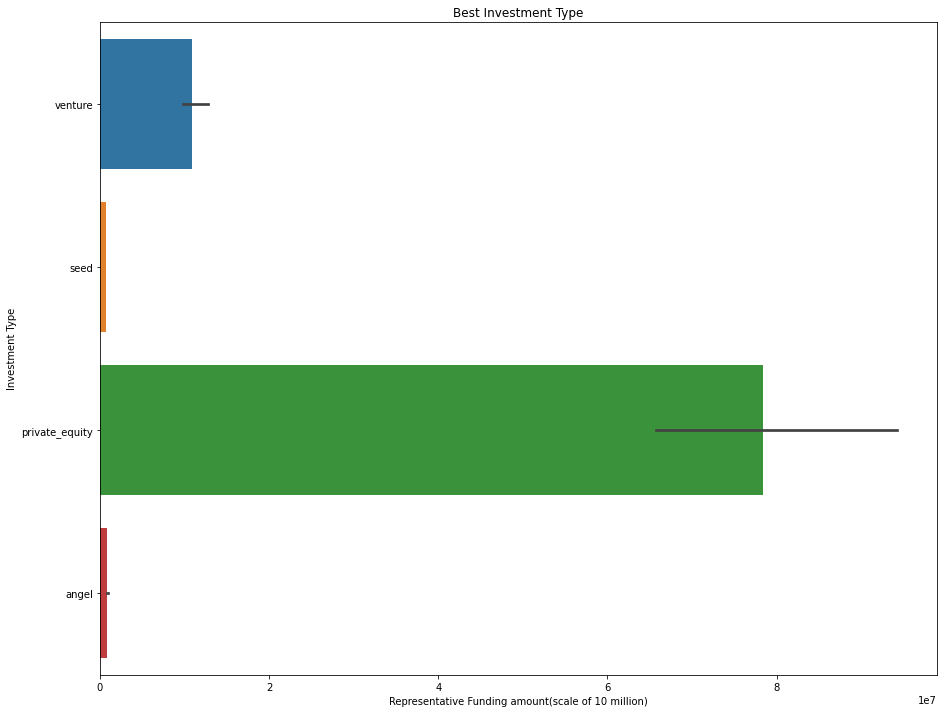

In [370]:
## making barplot to represent the median values accross 4 investment types
plt.figure(figsize=(15,12))
sns.barplot(data=master_frame1, x='raised_amount_usd',y='funding_round_type')
plt.title('Best Investment Type')
plt.ylabel('Investment Type')
plt.xlabel('Representative Funding amount(scale of 10 million)')
plt.show()

### Both in terms of figures and in terms of visual representation ,it is quite clear that venture type investment is most suited for sparks fund

### Filtering the dataframe master_frame1 for venture. Let us call this dataframe master_frameV

In [371]:
## creating master_framePE as asubset from master_frame1
master_frameV = master_frame1[master_frame1['funding_round_type'].isin(['venture'])]

In [372]:
master_frameV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22858 entries, 0 to 46750
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           22858 non-null  object 
 1   name                22858 non-null  object 
 2   category_list       22858 non-null  object 
 3   country_code        22858 non-null  object 
 4   funding_round_type  22858 non-null  object 
 5   raised_amount_usd   22858 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.2+ MB


In [373]:
## resetting index
master_frameV.reset_index(inplace=True,drop=True)

# Checkpoint 3: Country Analysis
## Now the country analysis

###  let us see the top nine countries which have received the highest total funding across ALL sectors for the n investment type private_equity

In [374]:
## creating variable total_investment to hold values of total investment for each country 
total_investment= master_frameV.groupby(['country_code'])['raised_amount_usd'].sum()

In [375]:
total_investment

country_code
ARE    1.842175e+08
ARG    1.460199e+08
ARM    7.730000e+06
AUS    7.595615e+08
AUT    4.759120e+08
           ...     
UKR    1.620000e+07
URY    1.433000e+07
USA    1.791577e+11
VNM    4.532051e+07
ZAF    1.056831e+08
Name: raised_amount_usd, Length: 95, dtype: float64

In [376]:
## rearranging total_investment in decending order to check top 9 countires in terms of total investments
total_investment.sort_values(ascending=False).head(10)

country_code
USA    1.791577e+11
CHN    1.821808e+10
GBR    1.122814e+10
IND    5.933705e+09
FRA    4.524056e+09
CAN    4.496790e+09
ISR    3.306101e+09
DEU    2.859293e+09
JPN    1.824956e+09
NLD    1.751932e+09
Name: raised_amount_usd, dtype: float64

### From here we can see tha the top 3 countries receiving the highest total funding across ALL sectors for private_equity investment type are: 1. USA  2. CHN  3.GBR. Since CHN is not an english speaking country, we will have to include the next i.e the 4th highest in our analysis. This country is India. So the top 3 countries for the analysis would be 1.USA  2.GBR 3.IND

In [377]:
## creating dataframe top9
top9 = master_frameV[master_frameV['country_code'].isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','JPN','DEU'])]

In [378]:
top9.shape

(20542, 6)

In [379]:
top9.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
2,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,USA,venture,5000000.0
3,/organization/10-minutes-with,10 Minutes With,Education,GBR,venture,4000000.0
4,/organization/1000memories,1000memories,Curated Web,USA,venture,2520000.0


In [380]:
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20542 entries, 0 to 22857
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           20542 non-null  object 
 1   name                20542 non-null  object 
 2   category_list       20542 non-null  object 
 3   country_code        20542 non-null  object 
 4   funding_round_type  20542 non-null  object 
 5   raised_amount_usd   20542 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.1+ MB


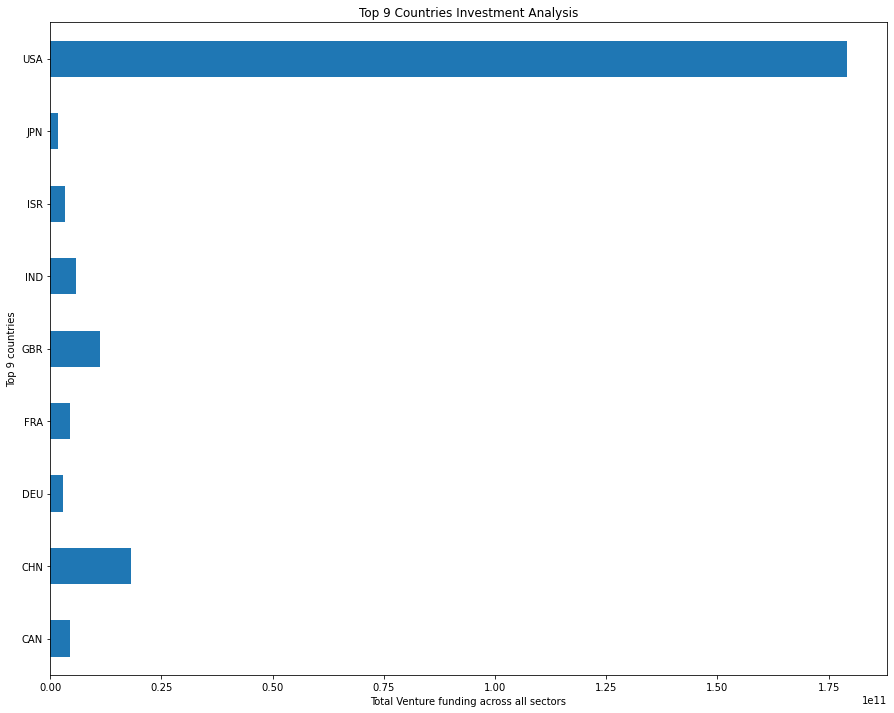

In [381]:
## Visualrepresentation using barplot
plt.figure(figsize=(15,12))
top9.groupby(['country_code'])['raised_amount_usd'].sum().plot.barh()
plt.xlabel('Total Venture funding across all sectors')
plt.ylabel('Top 9 countries')
plt.title('Top 9 Countries Investment Analysis')
plt.show()

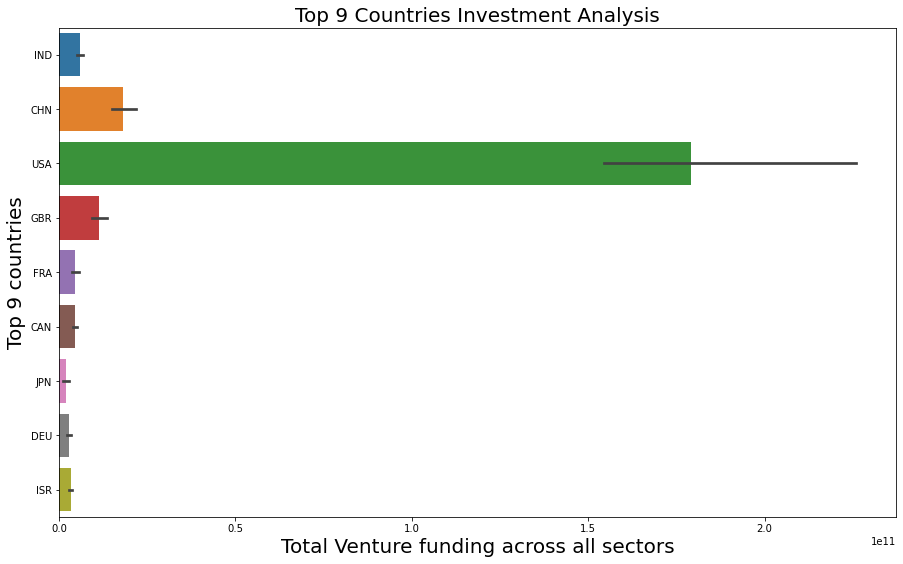

In [468]:
## better representation using sns barplot
plt.figure(figsize=(15,9))
sns.barplot(data=top9, y='country_code',x='raised_amount_usd',estimator=np.sum)
plt.xlabel('Total Venture funding across all sectors',fontsize=20)
plt.ylabel('Top 9 countries',fontsize=20)
plt.title('Top 9 Countries Investment Analysis',fontsize=20)
plt.show()

### From here we can see tha the top 3 countries receiving the highest total funding across ALL sectors for private_equity investment type are: 1. USA  2. CHN  3.GBR. 
### Since CHN is not an english speaking country, we will have to include the next i.e the 4th highest in our analysis. This country is India. 
### So the top 3 countries for the analysis would be: 1. USA   2. GBR   3. IND

# Checkpoint 4: Sector Analysis 1

### Here, we will be dealing with mapping file. We will convert it to appropraite form to be merged with top9.
### We will also extract 'primary sector' from top9. This primary sector has to be mapped with the main sector in mapping file.

In [383]:
## Importing mapping file as df_mapping
df_mapping = pd.read_csv('mapping.csv',encoding = 'unicode_escape')

In [384]:
## checking out the file
df_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [385]:
df_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [386]:
## initial assesment shows that the first row is meaningless so lets drop it 
df_mapping.drop(index=0,inplace=True)

In [387]:
## let us also reset the index
df_mapping.reset_index(inplace=True,drop=True)

In [388]:
## again checking the dataframe
df_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,3D,0,0,0,0,0,1,0,0,0
1,3D Printing,0,0,0,0,0,1,0,0,0
2,3D Technology,0,0,0,0,0,1,0,0,0
3,Accounting,0,0,0,0,0,0,0,0,1
4,Active Lifestyle,0,0,0,0,1,0,0,0,0


### Now the dataframe df_mapping is in wide-format. For our ananlysis, we need to convert it to long format.

## Changing  dataframe df_mapping from wide format to long format

In [389]:
## storing core sectors in one variable as a list
value_var = list(df_mapping.columns[1:])

In [390]:
print(value_var)

['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']


In [391]:
## storing category_list in another variable as a list using the setdiff1d() function
id_var =  list(np.setdiff1d(df_mapping.columns,value_var))

In [392]:
##Changing dataframe df_mapping from wide format to long format using pd.melt()
df_mapping = pd.melt(df_mapping,id_var,value_var)

In [393]:
## checking df_mapping
df_mapping

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
6178,Wholesale,"Social, Finance, Analytics, Advertising",0
6179,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6180,Wireless,"Social, Finance, Analytics, Advertising",0
6181,Women,"Social, Finance, Analytics, Advertising",0


### df_mapping has many rows in the column value. We only want to retain such rows which have a value of 1
### First let us see out of 6183 rows, how many row have value =1 in the column value

In [394]:
## checking how many row have value =1 in the column value
(df_mapping['value']==1).sum()

687

In [395]:
## selecting rows with value = 1
df_mapping = df_mapping[df_mapping['value']==1]

In [396]:
## resetting the index
df_mapping.reset_index(inplace=True, drop=True)

In [397]:
## having a look at modified df_mapping
df_mapping.head()

,category_list,variable,value
0,Adventure Travel,Automotive & Sports,1
1,Aerospace,Automotive & Sports,1
2,Auto,Automotive & Sports,1
3,Automated Kiosk,Automotive & Sports,1
4,Automotive,Automotive & Sports,1


In [398]:
## The column 'value' serves no real purpose for the analysis, so let's drop it
df_mapping = df_mapping.drop('value',axis=1)
df_mapping.head()

,category_list,variable
0,Adventure Travel,Automotive & Sports
1,Aerospace,Automotive & Sports
2,Auto,Automotive & Sports
3,Automated Kiosk,Automotive & Sports
4,Automotive,Automotive & Sports


In [399]:
## changing the name of column variable to main_sector
df_mapping = df_mapping.rename(columns={"variable": "main_sector"})
df_mapping.head()

,category_list,main_sector
0,Adventure Travel,Automotive & Sports
1,Aerospace,Automotive & Sports
2,Auto,Automotive & Sports
3,Automated Kiosk,Automotive & Sports
4,Automotive,Automotive & Sports


### Extracting primary sector from top9 and adding column 'primary sector' to top9

In [400]:
## extracting primary sector from top9 and adding column 'primary sector' to top9
top9['primary sector']  = top9['category_list'].apply(lambda x: x.split('|')[0])

<ipython-input-400-9a98e9ee8add>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top9['primary sector']  = top9['category_list'].apply(lambda x: x.split('|')[0])


In [401]:
top9['primary sector']

0                      Media
1                Curated Web
2                       Apps
3                  Education
4                Curated Web
                ...         
22852          Biotechnology
22853               Software
22854          Biotechnology
22855          Biotechnology
22857    Enterprise Software
Name: primary sector, Length: 20542, dtype: object

In [402]:
top9.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,primary sector
0,/organization/-fame,#fame,Media,IND,venture,10000000.0,Media
1,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0,Curated Web
2,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,USA,venture,5000000.0,Apps
3,/organization/10-minutes-with,10 Minutes With,Education,GBR,venture,4000000.0,Education
4,/organization/1000memories,1000memories,Curated Web,USA,venture,2520000.0,Curated Web


In [403]:
df_mapping

,category_list,main_sector
0,Adventure Travel,Automotive & Sports
1,Aerospace,Automotive & Sports
2,Auto,Automotive & Sports
3,Automated Kiosk,Automotive & Sports
4,Automotive,Automotive & Sports
...,...,...
682,Social Recruiting,"Social, Finance, Analytics, Advertising"
683,Social Television,"Social, Finance, Analytics, Advertising"
684,Social Travel,"Social, Finance, Analytics, Advertising"
685,Stock Exchanges,"Social, Finance, Analytics, Advertising"


## Merging top9 and df_mapping

In [404]:
## naming this merged dataframe as df_sector

df_sector = pd.merge(top9,df_mapping,left_on='primary sector', right_on='category_list',how='inner')

In [405]:
df_sector.head()

,permalink,name,category_list_x,country_code,funding_round_type,raised_amount_usd,primary sector,category_list_y,main_sector
0,/organization/-fame,#fame,Media,IND,venture,10000000.0,Media,Media,Entertainment
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,GBR,venture,15000000.0,Media,Media,Entertainment
2,/organization/all-def-digital,All Def Digital,Media,USA,venture,5000000.0,Media,Media,Entertainment
3,/organization/audiosocket,Audiosocket,Media|Music|Technology,USA,venture,650000.0,Media,Media,Entertainment
4,/organization/babble,Babble,Media|News|Parenting,USA,venture,2000000.0,Media,Media,Entertainment


In [406]:
## checking out df_sector
df_sector.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19372 entries, 0 to 19371
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           19372 non-null  object 
 1   name                19372 non-null  object 
 2   category_list_x     19372 non-null  object 
 3   country_code        19372 non-null  object 
 4   funding_round_type  19372 non-null  object 
 5   raised_amount_usd   19372 non-null  float64
 6   primary sector      19372 non-null  object 
 7   category_list_y     19372 non-null  object 
 8   main_sector         19372 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.5+ MB


### we have 2 useless columns namely category_list_x and category_list_y. So we will de dropping them

In [407]:
## dropping category_list_x and category_list_y
df_sector = df_sector.drop(['category_list_x','category_list_y'], axis=1)

In [408]:
## resetting index
df_sector.reset_index(inplace=True,drop=True)

In [409]:
df_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           19372 non-null  object 
 1   name                19372 non-null  object 
 2   country_code        19372 non-null  object 
 3   funding_round_type  19372 non-null  object 
 4   raised_amount_usd   19372 non-null  float64
 5   primary sector      19372 non-null  object 
 6   main_sector         19372 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.0+ MB


In [410]:
df_sector.head()

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary sector,main_sector
0,/organization/-fame,#fame,IND,venture,10000000.0,Media,Entertainment
1,/organization/90min,90min,GBR,venture,15000000.0,Media,Entertainment
2,/organization/all-def-digital,All Def Digital,USA,venture,5000000.0,Media,Entertainment
3,/organization/audiosocket,Audiosocket,USA,venture,650000.0,Media,Entertainment
4,/organization/babble,Babble,USA,venture,2000000.0,Media,Entertainment


### As we can see, the merged data frame df_sector has each primary sector mapped to its main sector  and the primary sector is present in a separate column. 

# Checkpoint 5: Sector Analysis 2

### Creating three separate data frames D1, D2 and D3 for each of the top three countries containing the observations of private equity funding type. 
### We will only include those entires in the 3 data frames D1, D2 and D3 for which raised_amount_usd lies in the range 5-15 million USD.
### We will not be including the upper and lower limits as multiple records exist at 15mllion USD

In [411]:
## multiple records at 15 million USD
df_sector[(df_sector['raised_amount_usd']==15000000)]

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary sector,main_sector
1,/organization/90min,90min,GBR,venture,15000000.0,Media,Entertainment
112,/organization/change-org,Change.org,USA,venture,15000000.0,Curated Web,"News, Search and Messaging"
238,/organization/grovo,Grovo,USA,venture,15000000.0,Curated Web,"News, Search and Messaging"
247,/organization/hired,Hired,USA,venture,15000000.0,Curated Web,"News, Search and Messaging"
257,/organization/howaboutwe,HowAboutWe,USA,venture,15000000.0,Curated Web,"News, Search and Messaging"
...,...,...,...,...,...,...,...
19284,/organization/octro-2,Octro,IND,venture,15000000.0,Online Gaming,Entertainment
19294,/organization/reserve,Reserve,USA,venture,15000000.0,Mobile Payments,"Social, Finance, Analytics, Advertising"
19309,/organization/predictix,Predictix,USA,venture,15000000.0,Enterprise Resource Planning,Others
19314,/organization/sunverge-energy-inc,"Sunverge Energy, Inc",USA,venture,15000000.0,Commercial Solar,Cleantech / Semiconductors


In [412]:
# Creating D1 for USA
D1 = df_sector[(df_sector['country_code']=='USA')]
D1.reset_index(inplace=True,drop=True)
D1

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary sector,main_sector
0,/organization/all-def-digital,All Def Digital,USA,venture,5000000.0,Media,Entertainment
1,/organization/audiosocket,Audiosocket,USA,venture,650000.0,Media,Entertainment
2,/organization/babble,Babble,USA,venture,2000000.0,Media,Entertainment
3,/organization/bedloo,Bedloo,USA,venture,657589.0,Media,Entertainment
4,/organization/cipher-online-media,Cipher Online Media,USA,venture,1349999.0,Media,Entertainment
...,...,...,...,...,...,...,...
14982,/organization/us-primate-rescue-inc,US Primate Rescue Inc.,USA,venture,50000.0,Animal Feed,Health
14983,/organization/user-interface,User Interface,USA,venture,8250000.0,User Interface,Others
14984,/organization/washio,Washio,USA,venture,10500000.0,Service Industries,Others
14985,/organization/yapta,Yapta,USA,venture,2300000.0,Tracking,Others


In [413]:
D1 = D1[(D1['raised_amount_usd'] > 5000000) & (D1['raised_amount_usd'] < 15000000)]

In [414]:
D1

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary sector,main_sector
10,/organization/matchmine,MatchMine,USA,venture,10000000.0,Media,Entertainment
13,/organization/newscorporation,News Corp,USA,venture,12500000.0,Media,Entertainment
14,/organization/nokeena,Ankeena Networks,USA,venture,9400000.0,Media,Entertainment
23,/organization/abilto,AbilTo,USA,venture,6000000.0,Curated Web,"News, Search and Messaging"
24,/organization/abine,Abine,USA,venture,6467283.0,Curated Web,"News, Search and Messaging"
...,...,...,...,...,...,...,...
14965,/organization/shopwiki,ShopWiki,USA,venture,6250000.0,Price Comparison,"Social, Finance, Analytics, Advertising"
14966,/organization/shuddle,Shuddle,USA,venture,9600000.0,Child Care,Health
14979,/organization/wizrocket-technologies,CleverTap,USA,venture,8000000.0,Consumer Behavior,"Social, Finance, Analytics, Advertising"
14983,/organization/user-interface,User Interface,USA,venture,8250000.0,User Interface,Others


In [415]:
# Creating D2 for GBR
D2 = df_sector[df_sector['country_code'].isin(['GBR'])&((df_sector['raised_amount_usd']>5000000)&(df_sector['raised_amount_usd']<15000000))]
D2.reset_index(inplace=True,drop=True)
D2

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary sector,main_sector
0,/organization/famecount,Starcount,GBR,venture,7464266.0,Curated Web,"News, Search and Messaging"
1,/organization/naked-wines,Naked Wines,GBR,venture,10000000.0,Curated Web,"News, Search and Messaging"
2,/organization/passado,Passado,GBR,venture,13200000.0,Curated Web,"News, Search and Messaging"
3,/organization/osper,Osper,GBR,venture,10000000.0,Apps,"News, Search and Messaging"
4,/organization/trafi,TRAFI,GBR,venture,6500000.0,Apps,"News, Search and Messaging"
...,...,...,...,...,...,...,...
281,/organization/duncan-todd,DUNCAN & Todd,GBR,venture,8485408.0,Local Businesses,Others
282,/organization/oxonica,Oxonica,GBR,venture,14034694.0,Health Diagnostics,Health
283,/organization/deltadot,deltaDOT,GBR,venture,6100000.0,Life Sciences,Others
284,/organization/e-leathergroup,E-LeatherGroup,GBR,venture,8425073.0,Textiles,Others


In [416]:
# Creating D3 for IND
D3 = df_sector[df_sector['country_code'].isin(['IND'])&((df_sector['raised_amount_usd']>5000000)&(df_sector['raised_amount_usd']<15000000))]
D3.reset_index(inplace=True,drop=True)
D3

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary sector,main_sector
0,/organization/-fame,#fame,IND,venture,10000000.0,Media,Entertainment
1,/organization/bharat-matrimony,Bharat Matrimony,IND,venture,11750000.0,Curated Web,"News, Search and Messaging"
2,/organization/fourinteractive,Four Interactive,IND,venture,10000000.0,Curated Web,"News, Search and Messaging"
3,/organization/money-on-mobile,Money On Mobile,IND,venture,10000000.0,Curated Web,"News, Search and Messaging"
4,/organization/people-interactive-india,People Interactive (India),IND,venture,8000000.0,Curated Web,"News, Search and Messaging"
...,...,...,...,...,...,...,...
118,/organization/smartairtrip,Smartairtrip,IND,venture,10000000.0,Hotels,Entertainment
119,/organization/easylink,EasyLink,IND,venture,5400000.0,Web Design,"News, Search and Messaging"
120,/organization/livspace,Livspace,IND,venture,8000000.0,Interior Design,Entertainment
121,/organization/razorpay,Razorpay,IND,venture,9000000.0,FinTech,"Social, Finance, Analytics, Advertising"


### Calculating total number of investments for each country:
#### This would be equal to the number of rows in each D1, D2 and D3

In [417]:
# Total number of investments for D1
D1.shape

(3844, 7)

In [418]:
# Total number of investments for D2
D2.shape

(286, 7)

In [419]:
# Total number of investments for D3
D3.shape

(123, 7)

### Calculating Total amount of investment (USD) for each country

In [420]:
## Total amount of investment (USD) for D1
D1['raised_amount_usd'].sum()

33971825657.0

In [421]:
## Total amount of investment (USD) for D2
D2['raised_amount_usd'].sum()

2505073487.0

In [422]:
## Total amount of investment (USD) for D3
D3['raised_amount_usd'].sum()

1086341777.0

### Finding  Sector name  (no. of investment-wise) and amount of investments in Top 3  main sectors for each country.

In [423]:
# Top 3 main sectors (number of investment-wise) for D1
D1.groupby(['main_sector'])['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     1095
Cleantech / Semiconductors                  738
Social, Finance, Analytics, Advertising     588
News, Search and Messaging                  515
Manufacturing                               319
Health                                      312
Entertainment                               199
Automotive & Sports                          78
Name: raised_amount_usd, dtype: int64

### So for D1 the 3 Top main sectors (no. of investment-wise) are: 1. Others  2. Cleantech / Semiconductors  3. Social, Finance, Analytics, Advertising 

In [424]:
# Top 3 main sectors (number of investment-wise) for D2
D2.groupby(['main_sector'])['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Cleantech / Semiconductors                 75
Others                                     68
Social, Finance, Analytics, Advertising    47
News, Search and Messaging                 31
Manufacturing                              24
Entertainment                              24
Health                                     12
Automotive & Sports                         5
Name: raised_amount_usd, dtype: int64

### So for D2 the 3 Top main sectors (no. of investment-wise) are: 1. Cleantech / Semiconductors 2. Others 3. Social, Finance, Analytics, Advertising

In [425]:
# Top 3 main sectors (number of investment-wise) for D3
D3.groupby(['main_sector'])['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     43
News, Search and Messaging                 20
Manufacturing                              15
Entertainment                              15
Social, Finance, Analytics, Advertising    14
Health                                      8
Cleantech / Semiconductors                  5
Automotive & Sports                         3
Name: raised_amount_usd, dtype: int64

### So for D3 the 3 Top main sectors (no. of investment-wise) are: 1. Others 2. News, Search and Messaging  3. Entertainment

##  Finding for top sector count-wise and second best, which company received the highest investment in each of the 3 top countries.

In [426]:
## Highest investment in top sector For D1 
D1[D1['main_sector'].apply(lambda x: x=='Others')]['raised_amount_usd'].max()

14699988.0

In [427]:
## Finding the company corresponding to the above value
D1[D1['raised_amount_usd']==14699988.0 ]

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary sector,main_sector
7537,/organization/paynearme,PayNearMe,USA,venture,14699988.0,E-Commerce,Others


In [428]:
## Highest investment in second top sector for D1
D1[D1['main_sector'].apply(lambda x: x=='Cleantech / Semiconductors')]['raised_amount_usd'].max()

14880000.0

In [429]:
## Finding the company corresponding to the above value
D1[D1['raised_amount_usd']== 14880000.0]

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary sector,main_sector
3251,/organization/glenrose-instruments,GlenRose Instruments,USA,venture,14880000.0,Biotechnology,Cleantech / Semiconductors


In [430]:
## Highest investment in top sector For D2 
D2[D2['main_sector'].apply(lambda x: x=='Cleantech / Semiconductors')]['raised_amount_usd'].max()

14906222.0

In [431]:
## Finding the company corresponding to the above value
D2[D2['raised_amount_usd']==14906222.0 ]

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary sector,main_sector
52,/organization/onyvax,Onyvax,GBR,venture,14906222.0,Biotechnology,Cleantech / Semiconductors


In [432]:
## Highest investment in second top sector for D2
D2[D2['main_sector'].apply(lambda x: x=='Others')]['raised_amount_usd'].max()

14400000.0

In [433]:
## Finding the company corresponding to the above value
D2[D2['raised_amount_usd']== 14400000.0]

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary sector,main_sector
152,/organization/ukash,KaliteUKASH,GBR,venture,14400000.0,E-Commerce,Others


In [434]:
## Highest investment in top sector For D3 
D3[D3['main_sector'].apply(lambda x: x=='Others')]['raised_amount_usd'].max()

14000000.0

In [435]:
## Finding the company corresponding to the above value
D3[D3['raised_amount_usd']==14000000.0]

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary sector,main_sector
14,/organization/eximsoft-trianz,EximSoft-Trianz,IND,venture,14000000.0,Software,Others
50,/organization/homeshop18,HomeShop18,IND,venture,14000000.0,E-Commerce,Others
85,/organization/intarvo,inTarvo,IND,venture,14000000.0,Consulting,"Social, Finance, Analytics, Advertising"


In [436]:
## Highest investment in second top sector for D3
D3[D3['main_sector'].apply(lambda x: x=='News, Search and Messaging')]['raised_amount_usd'].max()

13000000.0

In [437]:
## Finding the company corresponding to the above value
D3[D3['raised_amount_usd']==13000000.0 ]

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary sector,main_sector
24,/organization/quick-heal-technologies,Quick Heal Technologies,IND,venture,13000000.0,Software,Others
68,/organization/imimobile,IMImobile,IND,venture,13000000.0,Mobile,"News, Search and Messaging"
87,/organization/power-mech-projects,Power Mech Projects,IND,venture,13000000.0,Construction,Manufacturing


## For final analysis, i.e Checkpoint 6: Plots

### Plot showing the representative amount of investment in each funding type.

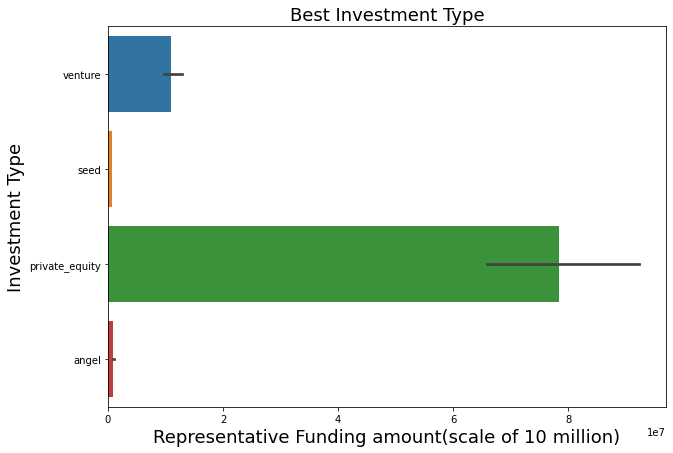

In [438]:
## creating seaborn barplot using dataframe df_master1
plt.figure(figsize=(10,7))
sns.barplot(data=master_frame1, x='raised_amount_usd',y='funding_round_type')
plt.title('Best Investment Type', fontsize =18)
plt.ylabel('Investment Type',fontsize =18)
plt.xlabel('Representative Funding amount(scale of 10 million)',fontsize =18)
plt.show()

###  Plot showing the top 9 countries against the total amount of investments of funding type Venture

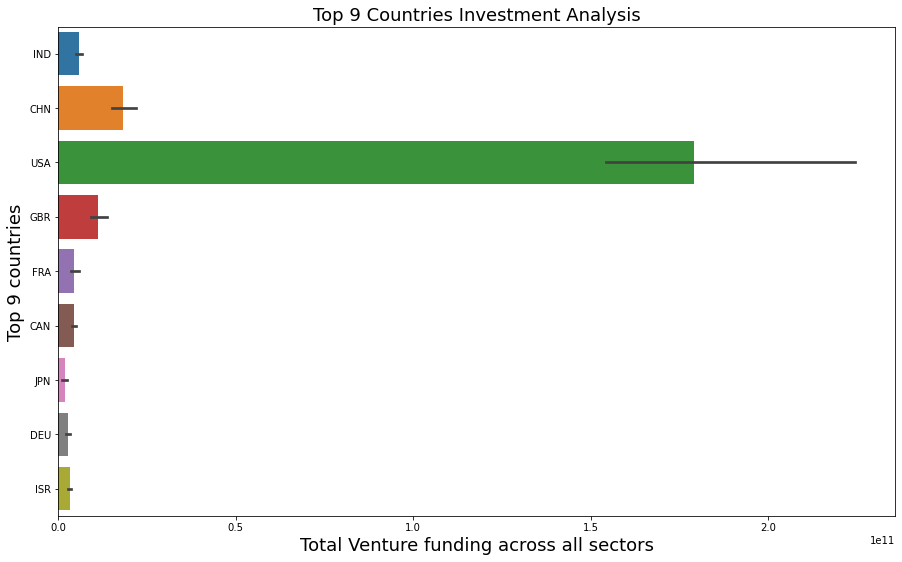

In [439]:
## creating seaborn barplot using dataframe top9
plt.figure(figsize=(15,9))
sns.barplot(data=top9, y='country_code',x='raised_amount_usd',estimator=np.sum)
plt.xlabel('Total Venture funding across all sectors',fontsize=18)
plt.ylabel('Top 9 countries',fontsize=18)
plt.title('Top 9 Countries Investment Analysis',fontsize=18)
plt.show()

### Plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart

### First we will have to create a datafarme D_Final which has the top 3 counties and top 3 sectors.
### For that we will make a dataframe from each D1, D2 and D3 containing their respective top 3 sectors. 
### finally we will concatenate these 3 new dataframes to make D_Final


In [440]:
D1a = D1[D1['main_sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]

In [441]:
D2a = D2[D2['main_sector'].isin(['Cleantech / Semiconductors','Others','Social, Finance, Analytics, Advertising'])]

In [442]:
D3a = D3[D3['main_sector'].isin(['Others','News, Search and Messaging','Manufacturing'])]

In [443]:
D_Final = pd.concat([D1a,D2a,D3a])

In [444]:
D_Final

,permalink,name,country_code,funding_round_type,raised_amount_usd,primary sector,main_sector
615,/organization/ameritech-college,AmeriTech College,USA,venture,6800000.0,Education,Others
618,/organization/better-ag,Better,USA,venture,10000000.0,Education,Others
620,/organization/brightstorm,Brightstorm,USA,venture,6000000.0,Education,Others
625,/organization/chromatik,Chromatik,USA,venture,5700000.0,Education,Others
628,/organization/college-book-renter,College Book Renter,USA,venture,10000000.0,Education,Others
...,...,...,...,...,...,...,...
113,/organization/conquest,Conquest,IND,venture,6000000.0,Startups,Others
115,/organization/zopnow,ZopNow,IND,venture,10000000.0,Groceries,Manufacturing
117,/organization/comat-technologies,Comat Technologies,IND,venture,6000000.0,Governments,Others
119,/organization/easylink,EasyLink,IND,venture,5400000.0,Web Design,"News, Search and Messaging"


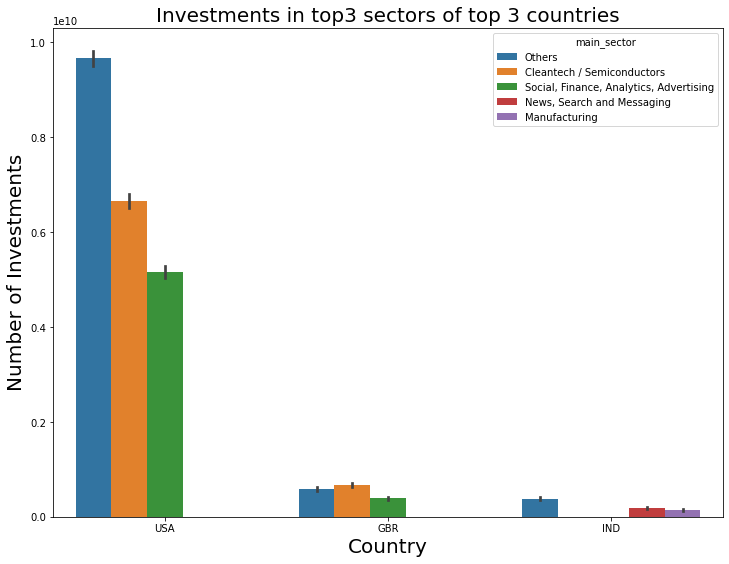

In [469]:
## creating seaborn barplot using dataframe D_Final
plt.figure(num=None, figsize=(12, 9))
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=D_Final,estimator=np.sum)
s.set_xlabel("Country",fontsize=20)
s.set_ylabel("Number of Investments",fontsize=20)
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =20)
plt.show()

In [465]:
## concatenating D1,D2 and D3 to create dataframe D
D = pd.concat([D1,D2,D3])

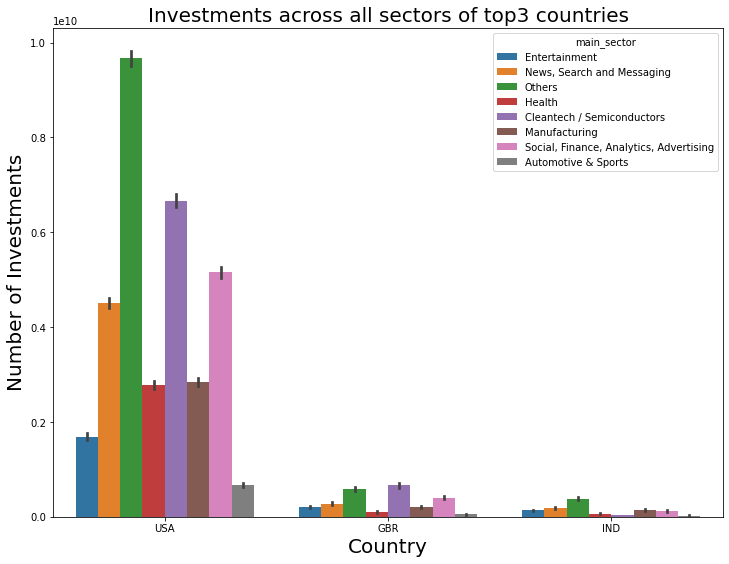

In [467]:
## creating seaborn barplot using dataframe D to see investments across all sectors in top3 countires
plt.figure(num=None, figsize=(12, 9))
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=D,estimator=np.sum)
s.set_xlabel("Country",fontsize=20)
s.set_ylabel("Number of Investments",fontsize=20)
s.set_title('Investments across all sectors of top3 countries',fontsize =20)
plt.show()